C:\Users\Rafae\AppData\Local\Temp\ipykernel_20536\1926620324.py:24: RuntimeWarning: invalid value encountered in divide
  grad = dE / dP


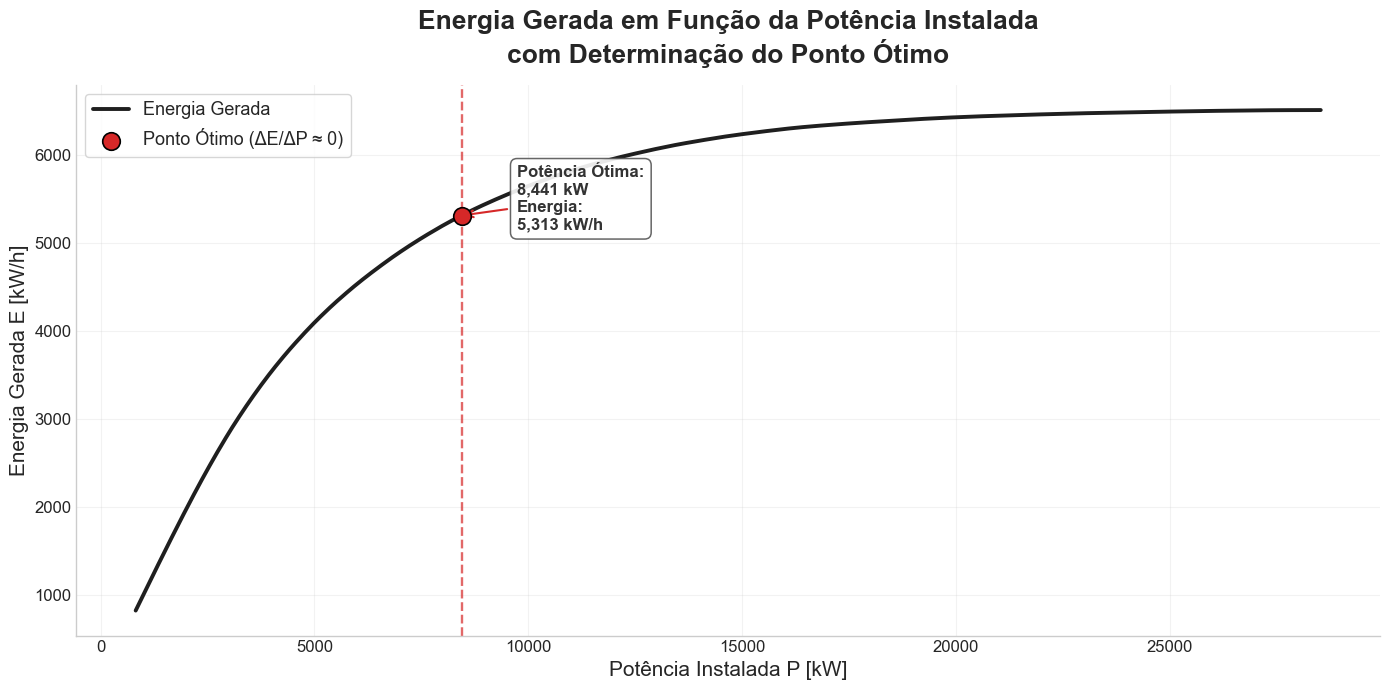

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

# ============================================
# 1) Ler planilha
# ============================================
arquivo = "Cálculo da PCH-SOLAR.xlsx"
df = pd.read_excel(arquivo, sheet_name="Potência Ótima")

# ============================================
# 2) Definir X, Y
# ============================================
X = df["PH kW"].iloc[1:1076].values
Y = df["e kw/h"].iloc[1:1076].values

# ============================================
# 3) Derivada discreta
# ============================================
dE = np.diff(Y)
dP = np.diff(X)
grad = dE / dP

idx_otimo = np.argmin(np.abs(grad))
P_otima = X[idx_otimo]
E_otima = Y[idx_otimo]

# ============================================
# 4) Criar pasta para salvar gráfico
# ============================================
os.makedirs("Graficos", exist_ok=True)

plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(14,7))

# Linha principal estilizada
plt.plot(
    X, Y,
    color="#1f1f1f",
    linewidth=2.8,
    label="Energia Gerada"
)

# Ponto ótimo destacado
plt.scatter(
    P_otima, E_otima,
    color="#d62828",
    s=160,
    edgecolors="black",
    linewidths=1.2,
    zorder=5,
    label="Ponto Ótimo (ΔE/ΔP ≈ 0)"
)

# Linha vertical no ponto ótimo
plt.axvline(
    P_otima,
    color="#d62828",
    linestyle="--",
    linewidth=1.7,
    alpha=0.7
)

# Texto elegante
plt.annotate(
    f"Potência Ótima:\n{P_otima:,.0f} kW\nEnergia:\n{E_otima:,.0f} kW/h",
    xy=(P_otima, E_otima),
    xytext=(40, -10),
    textcoords="offset points",
    fontsize=12,
    fontweight="bold",
    color="#333333",
    bbox=dict(
        boxstyle="round,pad=0.4",
        fc="white",
        ec="#555555",
        lw=1.1,
        alpha=0.9
    ),
    arrowprops=dict(
        arrowstyle="->",
        color="#d62828",
        lw=1.5
    )
)

# Título e eixos
plt.title(
    "Energia Gerada em Função da Potência Instalada\ncom Determinação do Ponto Ótimo",
    fontsize=19,
    weight='bold',
    pad=16
)

plt.xlabel("Potência Instalada P [kW]", fontsize=15)
plt.ylabel("Energia Gerada E [kW/h]", fontsize=15)

# Melhorias nos ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(alpha=0.25)

# Moldura ao redor (estilo publicação)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# Legenda refinada
plt.legend(
    fontsize=13,
    frameon=True,
    edgecolor="#cccccc",
    facecolor="white"
)

plt.tight_layout()
plt.savefig("Graficos/E_vs_P_Otimo.png", dpi=300)
plt.show()
